In [1]:
# A NEURAL NETWORK CLASSIFICATION PROGRAM WHICH DETECTS BENING OR MALIGNANT TUMOURS 
# USES A 'RELU' ACTIVAVTION FOR HIDDEN LAYERS AND A SIGMOID ACTIVATION FOR FINAL OUTPUT SINCE THIS IS A BINARY PROBLEM
# AN 'ADAM' OPTIMIZER AND 'BINARY CROSSENTROPY' LOSS IS USED
# EARLY STOP AND DROPOUT LAYERS ARE IMPLEMENTED TO FIGHT OVERFITTING AND REDUCE TIME
#

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# IMPORT THE DATA FROM WHERE IT IS STORED
df = pd.read_csv('cancer_classification.csv')

In [3]:
# look to see if there is any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [4]:
df.isnull().mean()

mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
benign_0__mal_1            0.0
dtype: float64

In [5]:
# get some key metrics on the data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


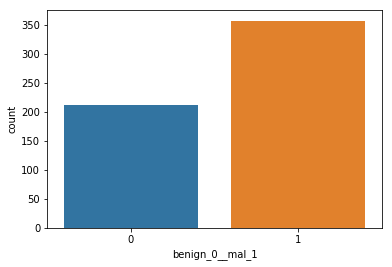

In [6]:
# look at a countplot to see if you have equal numbers of classification.  Benign or Malignant
# looks like there is a good mix of both
sns.countplot(x='benign_0__mal_1',data=df)

In [8]:
df.corr()['benign_0__mal_1']

mean radius               -0.730029
mean texture              -0.415185
mean perimeter            -0.742636
mean area                 -0.708984
mean smoothness           -0.358560
mean compactness          -0.596534
mean concavity            -0.696360
mean concave points       -0.776614
mean symmetry             -0.330499
mean fractal dimension     0.012838
radius error              -0.567134
texture error              0.008303
perimeter error           -0.556141
area error                -0.548236
smoothness error           0.067016
compactness error         -0.292999
concavity error           -0.253730
concave points error      -0.408042
symmetry error             0.006522
fractal dimension error   -0.077972
worst radius              -0.776454
worst texture             -0.456903
worst perimeter           -0.782914
worst area                -0.733825
worst smoothness          -0.421465
worst compactness         -0.590998
worst concavity           -0.659610
worst concave points      -0

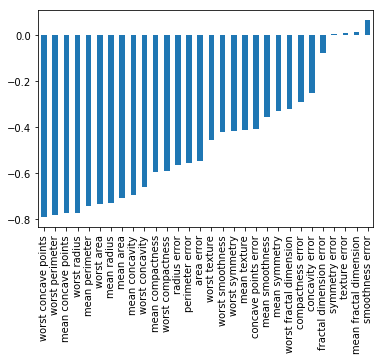

In [9]:
# look at correclation via a chart from worst to best. Drop vs. itself since it is a perfect 1.0 correlation
# Shows strong inverse correlations

df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

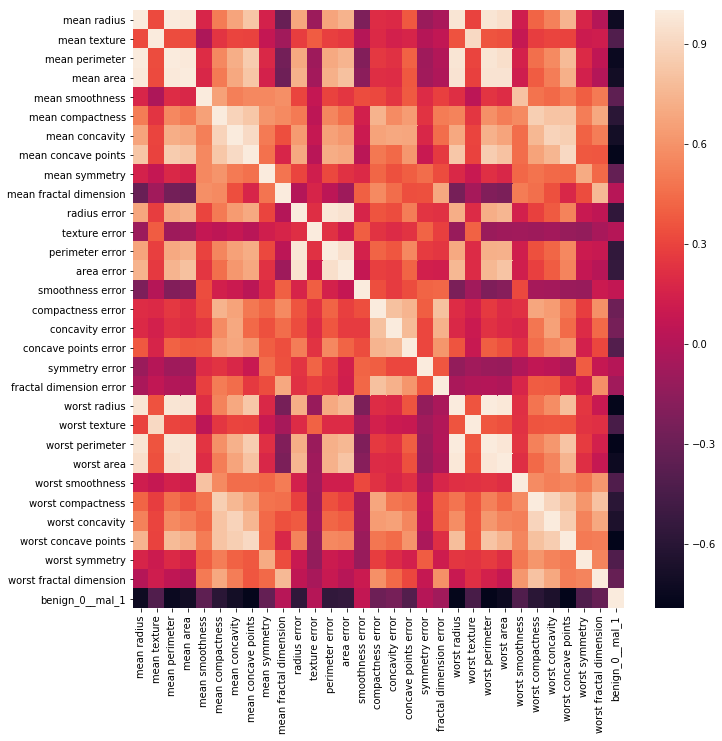

In [11]:
plt.figure(figsize=(11,11))
sns.heatmap(df.corr())

In [12]:
# set up your train test split
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [16]:
scaler = MinMaxScaler()

In [18]:
# DO NOT TRAIN FIT THE SCALER WITH THE Y_TRAIN DATA 

X_train = scaler.fit_transform(X_train)

In [19]:
X_test = scaler.transform(X_test)

In [21]:
#Train model and help avoid overfitting

from tensorflow.keras.models import Sequential

In [22]:
from tensorflow.keras.layers import Dense,Dropout

In [23]:
# 426 data points of 30 features
X_train.shape

(426, 30)

In [24]:
# Build the model
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY PROBLEM SO CHOOSE A SIGMOID for last output
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [26]:
# Use lots of epochs that way we can examine if we are overfitting the data

model.fit(x=X_train,y=y_train,epochs=600, validation_data =(X_test,y_test))

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6740 - val_loss: 0.6695
Epoch 2/600
426/426 [==============================] - 0s 119us/sample - loss: 0.6512 - val_loss: 0.6488
Epoch 3/600
426/426 [==============================] - 0s 121us/sample - loss: 0.6294 - val_loss: 0.6253
Epoch 4/600
426/426 [==============================] - 0s 107us/sample - loss: 0.6044 - val_loss: 0.5957
Epoch 5/600
426/426 [==============================] - 0s 125us/sample - loss: 0.5740 - val_loss: 0.5642
Epoch 6/600
426/426 [==============================] - 0s 121us/sample - loss: 0.5423 - val_loss: 0.5299
Epoch 7/600
426/426 [==============================] - 0s 108us/sample - loss: 0.5094 - val_loss: 0.4946
Epoch 8/600
426/426 [==============================] - 0s 113us/sample - loss: 0.4706 - val_loss: 0.4447
Epoch 9/600
426/426 [==============================] - 0s 117us/sample - loss: 0.4199 - val_loss: 0.3915
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0534 - val_loss: 0.1097
Epoch 79/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0528 - val_loss: 0.1134
Epoch 80/600
426/426 [==============================] - 0s 128us/sample - loss: 0.0528 - val_loss: 0.1161
Epoch 81/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0518 - val_loss: 0.1148
Epoch 82/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0541 - val_loss: 0.1163
Epoch 83/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0510 - val_loss: 0.1122
Epoch 84/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0508 - val_loss: 0.1210
Epoch 85/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0517 - val_loss: 0.1129
Epoch 86/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0506 - val_loss: 0.1121
Epoch 87/600
426/426 [=========================

Epoch 155/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0402 - val_loss: 0.1343
Epoch 156/600
426/426 [==============================] - 0s 96us/sample - loss: 0.0399 - val_loss: 0.1287
Epoch 157/600
426/426 [==============================] - 0s 97us/sample - loss: 0.0412 - val_loss: 0.1429
Epoch 158/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0406 - val_loss: 0.1358
Epoch 159/600
426/426 [==============================] - 0s 89us/sample - loss: 0.0422 - val_loss: 0.1273
Epoch 160/600
426/426 [==============================] - 0s 92us/sample - loss: 0.0399 - val_loss: 0.1432
Epoch 161/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0388 - val_loss: 0.1305
Epoch 162/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0420 - val_loss: 0.1526
Epoch 163/600
426/426 [==============================] - 0s 94us/sample - loss: 0.0412 - val_loss: 0.1294
Epoch 164/600
426/426 [======================

Epoch 232/600
426/426 [==============================] - 0s 118us/sample - loss: 0.0309 - val_loss: 0.1451
Epoch 233/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0314 - val_loss: 0.1555
Epoch 234/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0330 - val_loss: 0.1616
Epoch 235/600
426/426 [==============================] - 0s 101us/sample - loss: 0.0312 - val_loss: 0.1417
Epoch 236/600
426/426 [==============================] - 0s 99us/sample - loss: 0.0341 - val_loss: 0.1619
Epoch 237/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0311 - val_loss: 0.1501
Epoch 238/600
426/426 [==============================] - 0s 122us/sample - loss: 0.0297 - val_loss: 0.1544
Epoch 239/600
426/426 [==============================] - 0s 141us/sample - loss: 0.0345 - val_loss: 0.1415
Epoch 240/600
426/426 [==============================] - 0s 106us/sample - loss: 0.0331 - val_loss: 0.1497
Epoch 241/600
426/426 [================

426/426 [==============================] - 0s 129us/sample - loss: 0.0163 - val_loss: 0.1534
Epoch 385/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0153 - val_loss: 0.1702
Epoch 386/600
426/426 [==============================] - 0s 129us/sample - loss: 0.0173 - val_loss: 0.1478
Epoch 387/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0200 - val_loss: 0.1678
Epoch 388/600
426/426 [==============================] - 0s 131us/sample - loss: 0.0252 - val_loss: 0.1561
Epoch 389/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0160 - val_loss: 0.1592
Epoch 390/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0150 - val_loss: 0.1620
Epoch 391/600
426/426 [==============================] - 0s 100us/sample - loss: 0.0150 - val_loss: 0.1655
Epoch 392/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0154 - val_loss: 0.1641
Epoch 393/600
426/426 [============================

426/426 [==============================] - 0s 113us/sample - loss: 0.0086 - val_loss: 0.1957
Epoch 537/600
426/426 [==============================] - 0s 119us/sample - loss: 0.0081 - val_loss: 0.2309
Epoch 538/600
426/426 [==============================] - 0s 109us/sample - loss: 0.0073 - val_loss: 0.2035
Epoch 539/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0070 - val_loss: 0.2085
Epoch 540/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0070 - val_loss: 0.2250
Epoch 541/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0071 - val_loss: 0.2078
Epoch 542/600
426/426 [==============================] - 0s 121us/sample - loss: 0.0106 - val_loss: 0.2372
Epoch 543/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0066 - val_loss: 0.2088
Epoch 544/600
426/426 [==============================] - 0s 117us/sample - loss: 0.0079 - val_loss: 0.2316
Epoch 545/600
426/426 [============================

In [27]:
# Grab the values
losses = pd.DataFrame(model.history.history)

In [28]:
losses.head()

,loss,val_loss
0,0.674009,0.669544
1,0.651159,0.648805
2,0.629400,0.625305
3,0.604371,0.595678
4,0.573969,0.564234


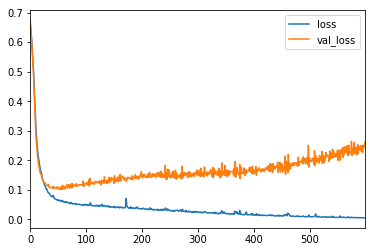

In [29]:
# Note val_loss is increasing, meaning we are overfitting our data
losses.plot()

In [34]:
# Need to redefine the model!!! 
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

#BINARY PROBLEM SO CHOOSE A SIGMOID for last output
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [31]:
# Incoporate early stopping so that we don't have to use too many epochs 

from tensorflow.keras.callbacks import EarlyStopping

In [32]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored quantity has stopped improving.
 |  
 |  Arguments:
 |      monitor: Quantity to be monitored.
 |      min_delta: Minimum change in the monitored quantity
 |          to qualify as an improvement, i.e. an absolute
 |          change of less than min_delta, will count as no
 |          improvement.
 |      patience: Number of epochs with no improvement
 |          after which training will be stopped.
 |      verbose: verbosity mode.
 |      mode: One of `{"auto", "min", "max"}`. In `min` mode,
 |          training will stop when the quantity
 |          monitored has stopped decreasing; in `max`
 |          mode it will stop when the quantity
 |          monitored has stopped increasing; in `auto`
 |          mode, t

In [35]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience = 25)
#patience is epochs after we first see a loss

In [36]:
# with early stop we can use a high number of epochs and not have to worry
model.fit(x=X_train,y=y_train,epochs=600, validation_data =(X_test,y_test),
         callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 2ms/sample - loss: 0.6518 - val_loss: 0.6368
Epoch 2/600
426/426 [==============================] - 0s 137us/sample - loss: 0.6120 - val_loss: 0.5955
Epoch 3/600
426/426 [==============================] - 0s 105us/sample - loss: 0.5703 - val_loss: 0.5511
Epoch 4/600
426/426 [==============================] - 0s 127us/sample - loss: 0.5288 - val_loss: 0.5088
Epoch 5/600
426/426 [==============================] - 0s 124us/sample - loss: 0.4843 - val_loss: 0.4594
Epoch 6/600
426/426 [==============================] - 0s 128us/sample - loss: 0.4375 - val_loss: 0.4121
Epoch 7/600
426/426 [==============================] - 0s 129us/sample - loss: 0.3956 - val_loss: 0.3696
Epoch 8/600
426/426 [==============================] - 0s 120us/sample - loss: 0.3594 - val_loss: 0.3436
Epoch 9/600
426/426 [==============================] - 0s 117us/sample - loss: 0.3333 - val_loss: 0.3066
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 126us/sample - loss: 0.0550 - val_loss: 0.1232
Epoch 79/600
426/426 [==============================] - 0s 112us/sample - loss: 0.0573 - val_loss: 0.1342
Epoch 80/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0559 - val_loss: 0.1240
Epoch 81/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0538 - val_loss: 0.1283
Epoch 82/600
426/426 [==============================] - 0s 120us/sample - loss: 0.0537 - val_loss: 0.1220
Epoch 83/600
426/426 [==============================] - 0s 108us/sample - loss: 0.0546 - val_loss: 0.1248
Epoch 84/600
426/426 [==============================] - 0s 115us/sample - loss: 0.0539 - val_loss: 0.1216
Epoch 85/600
426/426 [==============================] - 0s 113us/sample - loss: 0.0553 - val_loss: 0.1264
Epoch 86/600
426/426 [==============================] - 0s 124us/sample - loss: 0.0529 - val_loss: 0.1254
Epoch 87/600
426/426 [========================

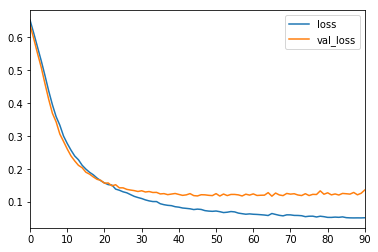

In [37]:
# this is what we expect to look for. where the val_loss isn't increasing
# EarlyStop stopped the epochs at 91/600 

model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [38]:
# An additional way to avoid overfitting is to add in DROPOUT layers which 
# turns off a percentage of neurons randomnly 

from tensorflow.keras.layers import Dropout

In [39]:
# Need to redefine the model!!! 
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
#Dropout layer
#value of 0 to 1
model.add(Dense(15,activation='relu'))
model.add(Dropout(0.5))

#BINARY PROBLEM SO CHOOSE A SIGMOID for last output
model.add(Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [40]:
model.fit(x=X_train,y=y_train,epochs=600, validation_data =(X_test,y_test),
         callbacks = [early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.6814 - val_loss: 0.6414
Epoch 2/600
426/426 [==============================] - 0s 138us/sample - loss: 0.6694 - val_loss: 0.6064
Epoch 3/600
426/426 [==============================] - 0s 125us/sample - loss: 0.6360 - val_loss: 0.5786
Epoch 4/600
426/426 [==============================] - 0s 129us/sample - loss: 0.5982 - val_loss: 0.5489
Epoch 5/600
426/426 [==============================] - 0s 118us/sample - loss: 0.5757 - val_loss: 0.5146
Epoch 6/600
426/426 [==============================] - 0s 125us/sample - loss: 0.5420 - val_loss: 0.4853
Epoch 7/600
426/426 [==============================] - 0s 145us/sample - loss: 0.5218 - val_loss: 0.4584
Epoch 8/600
426/426 [==============================] - 0s 128us/sample - loss: 0.5081 - val_loss: 0.4277
Epoch 9/600
426/426 [==============================] - 0s 119us/sample - loss: 0.4674 - val_loss: 0.4027
Epoch 10/60

Epoch 78/600
426/426 [==============================] - 0s 119us/sample - loss: 0.1392 - val_loss: 0.1050
Epoch 79/600
426/426 [==============================] - 0s 115us/sample - loss: 0.1256 - val_loss: 0.0914
Epoch 80/600
426/426 [==============================] - 0s 111us/sample - loss: 0.0900 - val_loss: 0.0887
Epoch 81/600
426/426 [==============================] - 0s 112us/sample - loss: 0.1145 - val_loss: 0.0868
Epoch 82/600
426/426 [==============================] - 0s 117us/sample - loss: 0.1088 - val_loss: 0.0920
Epoch 83/600
426/426 [==============================] - 0s 118us/sample - loss: 0.1237 - val_loss: 0.0921
Epoch 84/600
426/426 [==============================] - 0s 121us/sample - loss: 0.1002 - val_loss: 0.0916
Epoch 85/600
426/426 [==============================] - 0s 102us/sample - loss: 0.1195 - val_loss: 0.1008
Epoch 86/600
426/426 [==============================] - 0s 121us/sample - loss: 0.1070 - val_loss: 0.0850
Epoch 87/600
426/426 [========================

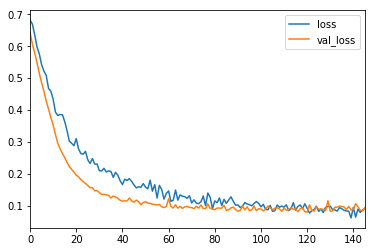

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [43]:
# Now predict! different in Keras for a classification problem

predictions = model.predict_classes(X_test)

In [44]:
# Two main metrics for classification problems

from sklearn.metrics import classification_report, confusion_matrix

In [45]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [46]:
print(confusion_matrix(y_test,predictions))

[[54  1]
 [ 2 86]]


In [ ]:
# PROGRAM DID VERY WELL IN IDENTIFYING USING DROPOUT LAYERS AND EARLY STOP